## The popular plotting libraries for Data visualization

===================================================================================================
- $\textbf{Cấp 1: Matplotlib & pandas.}$ Dùng để vẽ các dữ liệu một cách tự do với hơi hướng xử lý đơn giản
- $\textbf{Cấp 2: Seaborn.}$ Dùng khi xử lý các yêu cầu phức tạp hơn; với giao diện kết quả sắc nét hơn
- $\textbf{Cấp 3: ggplot & ploty.}$ Có thể tạo ra những hình vẽ có tính tương tác tốt (interactive plots)

Dưới đây là các chuyên đề và BT tương ứng của phần "Data visualization" này.

===================================================================================================

===================================================================================================
# Topic 1. Line Charts
===================================================================================================

===================================================================================================
$\textbf{Target 1. }\textit{Answer the following question}$

Từ dữ liệu "Museums_and_Galleries_monthly_visits_April_to_June.csv"; hãy thực hiện lần lượt các yêu cầu sau

- 1) Loading dataset and display the first 5 rows

- 2) Extract the sub-dataframe which have the number of visitors more than 750000

- 3) How many visitors did the "NATIONAL GALLERY"

- 4) In October 2018, how many more visitors did "(RA) FORT NELSON"? 

- 5) Does "NATIONAL MUSEUMS LIVERPOOL" receive more visitors than the "TATE LIVERPOOL" in 2018? 

===================================================================================================

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load dataset
df = pd.read_excel('./dataset/Museums_and_Galleries_monthly_visits_April_to_June.xlsx', index_col=0)
df.head()

,museum,year,month,visits
0,TOTAL VISITOR FIGURES,2004,4,0
1,TOTAL VISITOR FIGURES,2004,5,0
2,TOTAL VISITOR FIGURES,2004,6,0
3,TOTAL VISITOR FIGURES,2004,7,0
4,TOTAL VISITOR FIGURES,2004,8,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11131 entries, 0 to 11130
Data columns (total 4 columns):
museum    11131 non-null object
year      11131 non-null int64
month     11131 non-null int64
visits    11131 non-null int64
dtypes: int64(3), object(1)
memory usage: 434.8+ KB


In [5]:
# Extract the sub-dataframe which have the number of visitors more than 750000
large_visit_df = df[df['visits'] > 750000].reset_index(drop=True)
large_visit_df

,museum,year,month,visits
0,TOTAL VISITOR FIGURES,2008,7,794085
1,TOTAL VISITOR FIGURES,2008,8,941157
2,TOTAL VISITOR FIGURES,2009,7,826581
3,TOTAL VISITOR FIGURES,2009,8,942222
4,TOTAL VISITOR FIGURES,2009,10,755101
...,...,...,...,...
69,TOTAL VISITOR FIGURES,2019,2,782463
70,TOTAL VISITOR FIGURES,2019,3,849847
71,TOTAL VISITOR FIGURES,2019,4,898219
72,TOTAL VISITOR FIGURES,2019,5,837141


In [6]:
# How many visitors did the "NATIONAL GALLERY"
NatGall_df = df[df['museum'] == 'NATIONAL GALLERY'].reset_index(drop=True)
NatGall_df

,museum,year,month,visits
0,NATIONAL GALLERY,2004,4,87400
1,NATIONAL GALLERY,2004,5,78200
2,NATIONAL GALLERY,2004,6,63800
3,NATIONAL GALLERY,2004,7,92000
4,NATIONAL GALLERY,2004,8,88600
...,...,...,...,...
187,NATIONAL GALLERY,2019,11,0
188,NATIONAL GALLERY,2019,12,0
189,NATIONAL GALLERY,2020,1,0
190,NATIONAL GALLERY,2020,2,0


In [7]:
# the total number of people who visited "NATIONAL GALLERY":
NatGall_vis_num = NatGall_df['visits'].sum()
NatGall_vis_num

15913093

In [8]:
# In October 2018, how many more visitors did "(RA) FORT NELSON"?
df1 = df[df.year == 2018]
df2 = df1[df1.month == 10]
df3 = df2[df2.museum == '(RA) FORT NELSON']
df3

,museum,year,month,visits
5358,(RA) FORT NELSON,2018,10,1588


In [9]:
# Does "NATIONAL MUSEUMS LIVERPOOL" receive more visitors than the "TATE LIVERPOOL" in 2018?
df1[df1.museum == 'NATIONAL MUSEUMS LIVERPOOL'].shape[0]

12

In [10]:
df1[df1.museum == 'TATE LIVERPOOL'].shape[0]

12

=> The number of visitors "NATIONAL MUSEUMS LIVERPOOL" and "TATE LIVERPOOL" had in 2018 are the same

===================================================================================================

$\textbf{Target 2. }$ The _"(IWM) LONDON"_  claims they ran an event in 2014 that brought an incredible number of visitors, and that they should get extra budget to run a similar event again. The other local museums think these types of events aren't that important, and budgets should be split purely based on recent visitors on an average day.

Hint:

- 1) Suppose that the local museum here contains the word 'LONDON'

- 2) To show the museum board how the event compared to regular traffic at each museum, create a line chart that shows how the number of visitors to each museum evolved over time (until 2014).

===================================================================================================

In [11]:
groupby_year_df = pd.DataFrame(df.groupby(['museum', 'year'])['visits'].sum()).reset_index()
groupby_year_df = groupby_year_df[(groupby_year_df.museum != 'TOTAL VISITOR FIGURES') & ( groupby_year_df.year < 2020) & (groupby_year_df.museum.str.contains('LONDON'))]

groupby_year_df

,museum,year,visits
51,(IWM) LONDON,2004,110766
52,(IWM) LONDON,2005,146031
53,(IWM) LONDON,2006,142469
54,(IWM) LONDON,2007,150887
55,(IWM) LONDON,2008,166791
56,(IWM) LONDON,2009,177445
57,(IWM) LONDON,2010,213866
58,(IWM) LONDON,2011,193827
59,(IWM) LONDON,2012,191573
60,(IWM) LONDON,2013,72171


In [12]:
museums = groupby_year_df.museum.unique()
museums

array(['(IWM) LONDON', '(RA) WHITE TOWER (BASED AT THE TOWER OF LONDON)',
       'MUSEUM OF LONDON'], dtype=object)

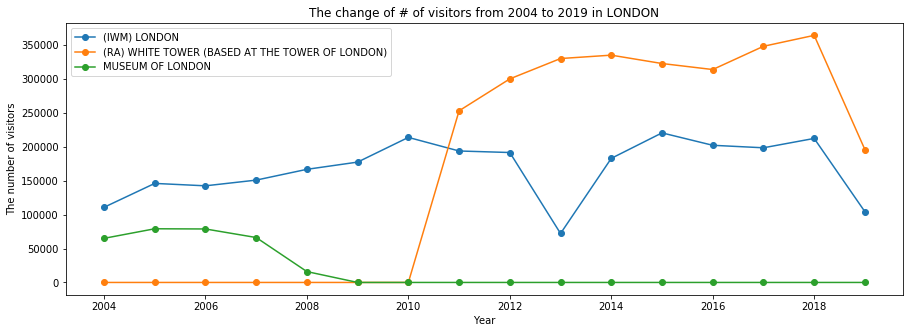

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches([15, 5])

for museum in museums:
    sub_df =  groupby_year_df[ groupby_year_df.museum ==  museum]
    ax.plot(sub_df['year'], sub_df['visits'], marker = 'o', label=museum)

ax.set_ylabel('The number of visitors')
ax.set_xlabel('Year')
ax.set_title('The change of # of visitors from 2004 to 2019 in LONDON')
ax.legend()
plt.show()

===================================================================================================

$\textbf{Target 3.}$
When meeting with the employees at _"TATE ST IVES"_, you hear that one major pain point is that the number of museum visitors varies greatly with the seasons, with low seasons (when the employees are perfectly staffed and happy) and also high seasons (when the employees are understaffed and stressed). You realize that if you can predict these high and low seasons, you can plan ahead to hire some additional seasonal employees to help out with the extra work.

__Step 1.__ _Create a line chart that shows how the number of visitors to Avila Adobe has evolved over time_. 


__Step 2.__ _Does "TATE ST IVES" get more visitors:_ Using this information, when should the museum staff additional seasonal employees?

===================================================================================================

In [14]:
tate_stives_df = df[(df.museum == 'TATE ST IVES') & (df.year <= 2019)].reset_index(drop=True)
tate_stives_df1 = tate_stives_df[tate_stives_df.year < 2012]
tate_stives_df2 = tate_stives_df[tate_stives_df.year >= 2012]
tate_stives_df.head(10)

,museum,year,month,visits
0,TATE ST IVES,2004,4,4711
1,TATE ST IVES,2004,5,4056
2,TATE ST IVES,2004,6,5273
3,TATE ST IVES,2004,7,6717
4,TATE ST IVES,2004,8,7676
5,TATE ST IVES,2004,9,5434
6,TATE ST IVES,2004,10,4283
7,TATE ST IVES,2004,11,1474
8,TATE ST IVES,2004,12,1399
9,TATE ST IVES,2005,1,1304


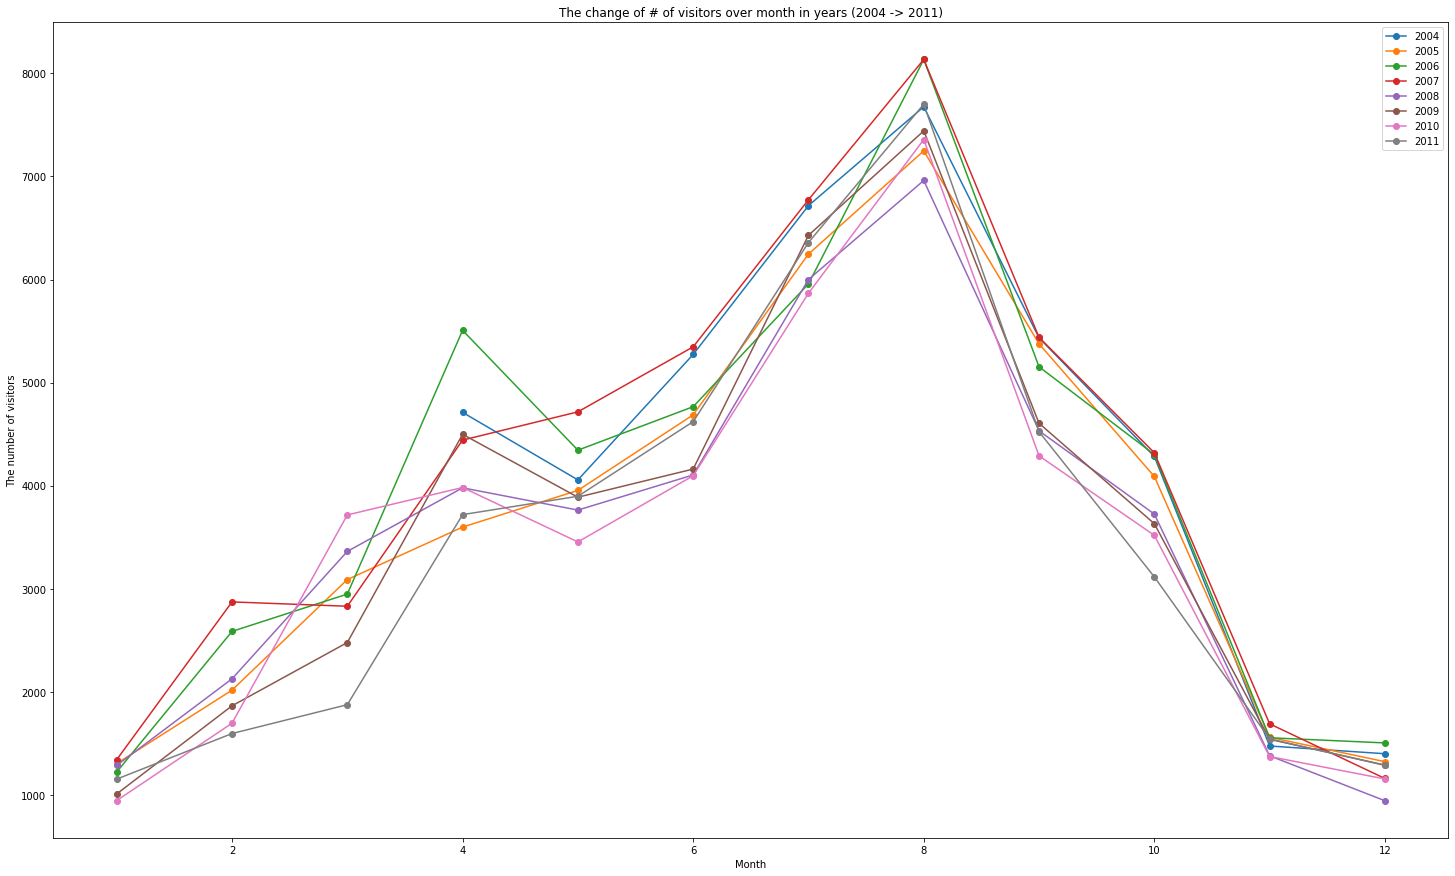

In [15]:
years1 = range(2004, 2012)

def plot_line(years):
    fig, ax = plt.subplots()
    fig.set_size_inches([25, 15])
    
    for year in years:
        sub_df = tate_stives_df[tate_stives_df.year == year]
        ax.plot(sub_df['month'], sub_df['visits'], marker = 'o', label = year)
    
    ax.set_xlabel('Month')
    ax.set_ylabel('The number of visitors')
    ax.set_title('The change of # of visitors over month in years ({} -> {})'.format(years[0], years[-1]))

    plt.legend()
    plt.show()

plot_line(years1)

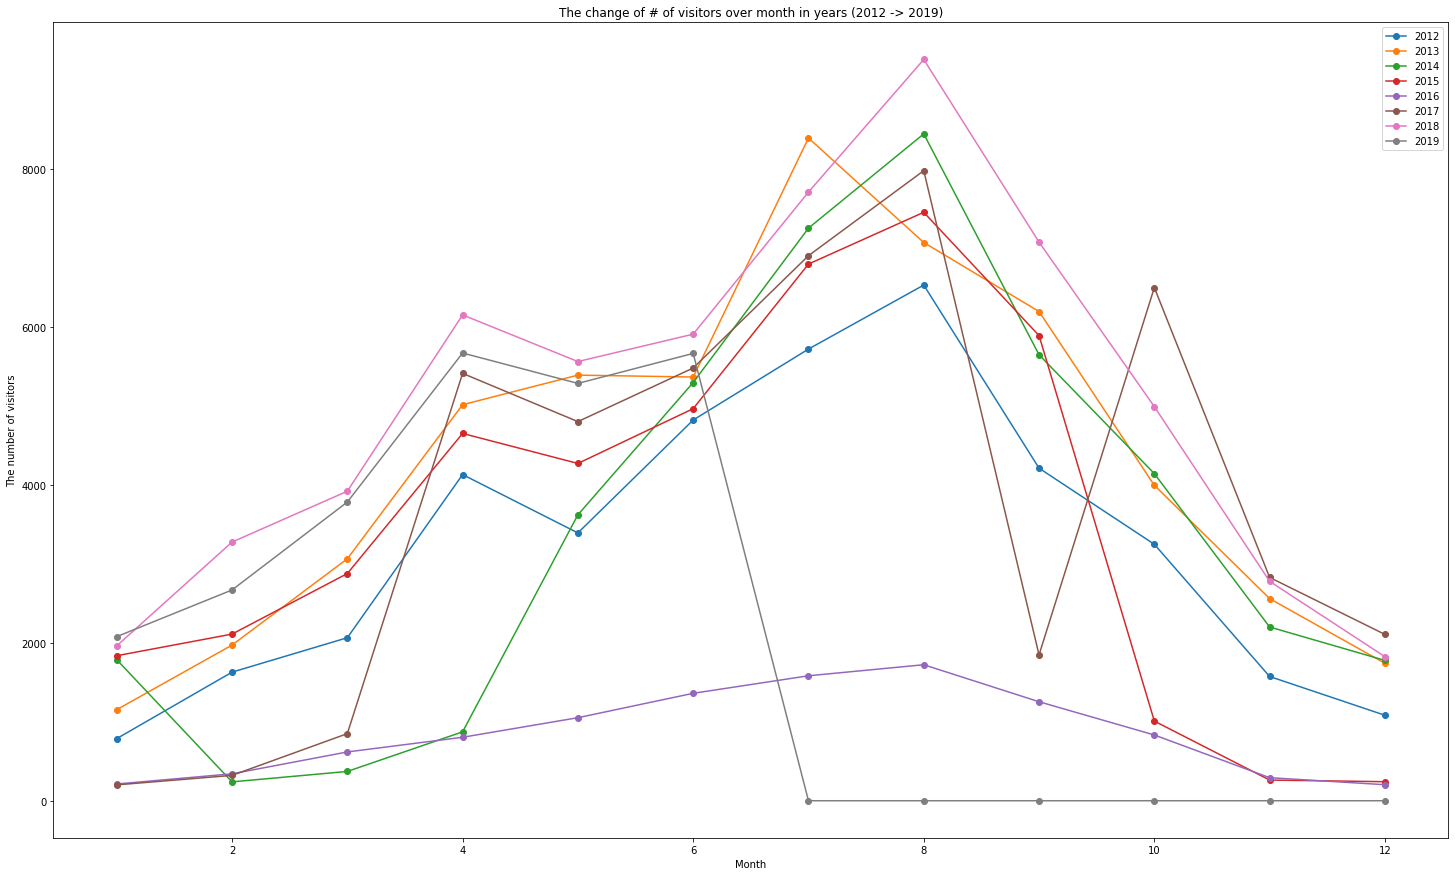

In [16]:
years2 = range(2012, 2020)
plot_line(years2)

=> Conclusion: We see that the number of visitors on July and October are much higher than on other months. So, we should put more attention on these 2 months.

===================================================================================================

# Topic 2.  Bar Charts

===================================================================================================

### Scenario

You've recently decided to create your very own video game!  As an avid reader of [IGN Game Reviews](https://www.ign.com/reviews/games), you hear about all of the most recent game releases, along with the ranking they've received from experts, ranging from 0 (_Disaster_) to 10 (_Masterpiece_).

===================================================================================================
#### Viewing dataset

===================================================================================================

$\textbf{Target 1.}$ _Answers these following questions :_

- 1) Using ign_scores.csv for this target

- 1) What is the highest average score received by PC games?

- 2) On the "PlayStation Vita" platform, which genre has the lowest average score?

===================================================================================================

In [44]:
# load dataset
ign_scores_df = pd.read_csv('./dataset/ign_scores.csv')
ign_scores_df.head()

,Platform,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
0,Dreamcast,6.882857,7.511111,6.281818,8.200000,8.340000,8.088889,7.700000,7.042500,7.616667,7.628571,7.272222,6.433333
1,Game Boy Advance,6.373077,7.507692,6.057143,6.226316,6.970588,6.532143,7.542857,6.657143,6.444444,6.928571,6.694444,7.175000
2,Game Boy Color,6.272727,8.166667,5.307692,4.500000,6.352941,6.583333,7.285714,5.897436,4.500000,5.900000,5.790698,7.400000
3,GameCube,6.532584,7.608333,6.753846,7.422222,6.665714,6.133333,7.890909,6.852632,6.981818,8.028571,7.481319,7.116667
4,Nintendo 3DS,6.670833,7.481818,7.414286,6.614286,7.503448,8.000000,7.719231,6.900000,7.033333,7.700000,6.388889,7.900000


In [45]:
#  What is the highest average score received by PC games?
ign_scores_df['average_score'] = ign_scores_df.mean(axis=1)
ign_scores_df = ign_scores_df.sort_values(by='average_score', ascending=False).reset_index(drop=True)
ign_scores_df.iloc[[0], :]

,Platform,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy,average_score
0,Xbox One,7.702857,7.566667,7.254545,7.171429,6.733333,8.1,8.291667,8.163636,8.02,7.733333,7.331818,8.5,7.714107


In [46]:
# On the "PlayStation Vita" platform, which genre has the lowest average score?
ign_scores_df[ign_scores_df.Platform == 'PlayStation Vita']

,Platform,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy,average_score
3,PlayStation Vita,7.173077,6.133333,8.057143,7.527273,8.56875,8.25,7.3375,6.3,7.66,5.725,7.13,8.9,7.39684


-> Simulation has the lowest average score.

===================================================================================================

$\textbf{Target 2.}$ Since you can remember, your favorite video game has been [**Mario Kart Wii**](https://www.ign.com/games/mario-kart-wii), a racing game released for the Wii platform in 2008.  And, IGN agrees with you that it is a great game -- their rating for this game is a whopping 8.9!  Inspired by the success of this game, you're considering creating your very own racing game for the Wii platform.
#### Step 1.
Create a bar chart that shows the average score for **racing** games, for each platform.  Your chart should have one bar for each platform.

#### Step 2.
Based on the bar chart, do you expect a __racing__ game for the **Wii** platform to receive a high rating?  If not, what gaming platform seems to be the best alternative?

===================================================================================================


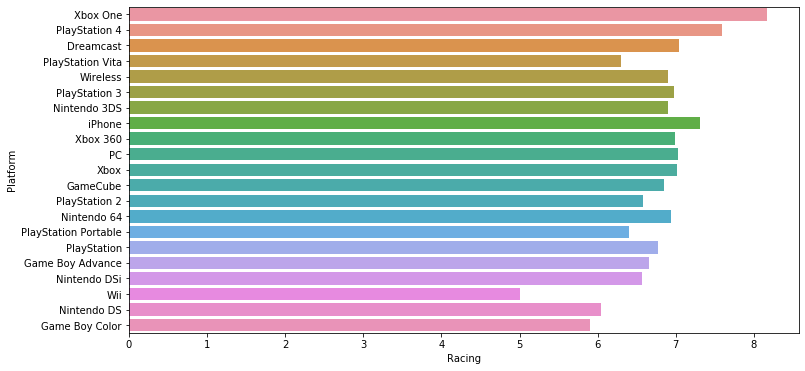

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches([12, 6])

sns.barplot(y = 'Platform', x = 'Racing', data = ign_scores_df, ax=ax)

plt.show()

__Nhận xét.__
- 1) Xét về mặt _"Racing"_; các game trên _"Wii"_ còn rất yếu 
- 2) Các game trên _"Xbox One"_ được đánh giá tính _"racing"_ cao hơn cả.

===================================================================================================

__Target 3.__ Eventually, you decide against creating a racing game for Wii, but you're still committed to creating your own video game!  Since your gaming interests are pretty broad (_... you generally love most video games_), you decide to use the IGN data to inform your new choice of genre and platform.

#### Step 1.
Use the data to create a heatmap of average score by genre and platform.  

#### Step 2.
Which combination of genre and platform receives the highest average ratings?  Which combination receives the lowest average rankings?

===================================================================================================

In [48]:
ign_scores_df = ign_scores_df.drop(['average_score'], axis=1)

In [50]:
ign_scores_df = ign_scores_df.set_index('Platform')
ign_scores_df

KeyError: "None of ['Platform'] are in the columns"

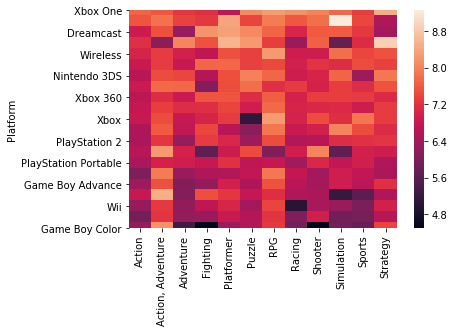

In [52]:
sns.heatmap(ign_scores_df)

plt.show()

# Topic 3. Inferences in Pie & count charts
__Renaming then Viewing data set.__

__Target 1.__ _using pie chart show name of ten club have the most age

In [53]:
epldata = pd.read_csv('./dataset/epldata_final.csv')
epldata.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


__Target 2.__ _ using catplot number of people in each postion

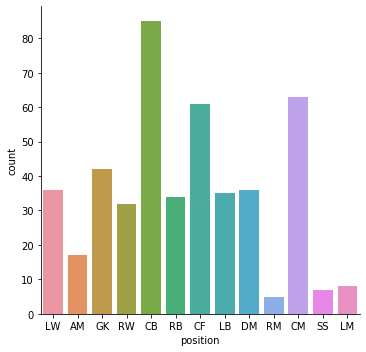

In [60]:
sns.catplot('position', data = epldata, kind='count')

__Target 3.__ _ using catplot to show mean age vs position

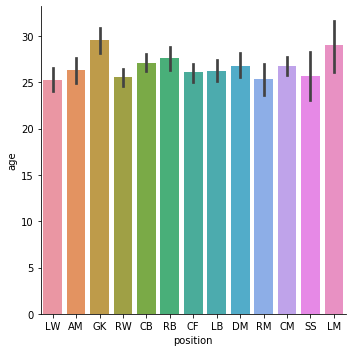

In [62]:
sns.catplot(x = 'position', y = 'age', data = epldata, kind='bar')

# Topic 4. Histogram
We have 2 dataset in this Section: The data file corresponding to benign tumors into a DataFrame called cancer_b_data; while another is corresponding to malignant tumors.

In [65]:
# Read and show Cancer_b dataset
cancer_b = pd.read_csv('./dataset/cancer_b.csv', index_col = 'Id')
cancer_b.head()

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
Id,,,,,,,,,,,,,,,,,,,,,
8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


In [66]:
# Read and show Cancer_m dataset
cancer_m = pd.read_csv('./dataset/cancer_m.csv', index_col = 'Id')
cancer_m.head()

,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),Symmetry (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
Id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


1) The data for benign tumors, what is the largest value for 'Perimeter (mean)'?

In [74]:
cancer_b['Perimeter (mean)'].max()

114.6

2) What is the value for 'Radius (mean)' for the tumor with Id 842517

In [75]:
cancer_m.loc[842517, 'Radius (mean)']

20.57

### Investigating differences
Step 1. Create 2 histograms that show the distribution in values for `'Area (mean)'` for both benign and malignant tumors

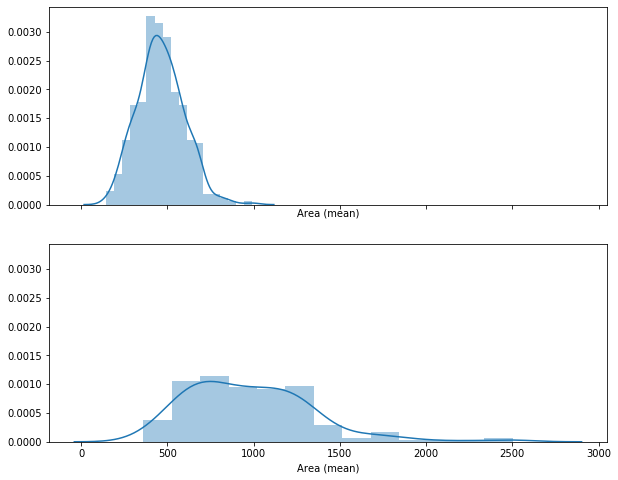

In [86]:
fig, (ax0, ax1) = plt.subplots(2, 1, sharex=True, sharey=True)
fig.set_size_inches([10, 8])

sns.distplot(cancer_b['Area (mean)'], ax=ax0)
sns.distplot(cancer_m['Area (mean)'], ax=ax1)

plt.show()

Step 2. A researcher approaches you for help with identifying how the `'Area (mean)'` column can be used to understand the difference between benign and malignant tumors.  Based on the histograms above, 
- Do malignant tumors have higher or lower values for `'Area (mean)'` (relative to benign tumors), on average?
- Which tumor type seems to have a larger range of potential values?

-> Malignant tumors have higher values for 'Area (mean)' (relative to benign tumors), on average.

-> Malignant tumors seems to have a larger range of potential values

### Problem. A very useful column 
#### Step 1.

Create two KDE plots that show the distribution in values for `'Radius (worst)'` for both benign and malignant tumors.  (_To permit easy comparison, create a single figure containing both KDE plots in the code cell below._)

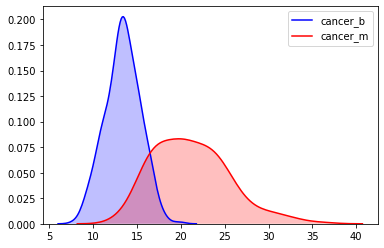

In [90]:
fig, ax = plt.subplots()

sns.kdeplot(cancer_b['Radius (worst)'], shade=True, color="b", label='cancer_b', ax=ax)
sns.kdeplot(cancer_m['Radius (worst)'], shade=True, color="r", label='cancer_m', ax=ax)

plt.show()

#### Step 2.

A hospital has recently started using an algorithm that can diagnose tumors with high accuracy.  Given a tumor with a value for `'Radius (worst)'` of 25, do you think the algorithm is more likely to classify the tumor as benign or malignant?

-> Malignant

# Topic 5. Scatter plot & regression line
##### Review the data

In [92]:
# # read and show candy dataset
candy = pd.read_csv('./dataset/candy.csv', index_col='id')
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547


_The dataset contains 83 rows, where each corresponds to a different candy bar. There are 13 columns:_
- __'competitorname'__ contains the name of the candy bar.
- __the next 9 columns__ (from 'chocolate' to 'pluribus') describe the candy. For instance, rows with chocolate candies have "Yes" in the 'chocolate' column (and candies without chocolate have "No" in the same column).
- __'sugarpercent'__ provides some indication of the amount of sugar, where higher values signify higher sugar content.
- __'pricepercent'__ shows the price per unit, relative to the other candies in the dataset.
- __'winpercent'__ is calculated from the survey results; higher values indicate that the candy was more popular with _survey respondents_.

__Target 1.__ Answer the questions
- 1) How many columns of 'Kit Kat' received 'Yes' in the survey
- 2) Which candy was more popular with survey respondents;: 'Kit Kat' or 'Almond Joy'?
- 3) Which candy has higher sugar content: 'Twizzlers' or '3 Musketeers'?

In [95]:
# How many columns of 'Kit Kat' received 'Yes' in the survey
candy[candy.competitorname == 'Kit Kat']
# ----> 3

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
26,Kit Kat,Yes,No,No,No,No,Yes,No,Yes,No,0.313,0.511,76.7686


In [98]:
# Which candy was more popular with survey respondents;: 'Kit Kat' or 'Almond Joy'?
candy[(candy.competitorname == 'Kit Kat')]['winpercent'].values[0]

76.7686

In [100]:
candy[(candy.competitorname == 'Almond Joy')]['winpercent'].values[0]

50.347546

----> Kit Kat was more popular than Almod Joy

In [101]:
# Which candy has higher sugar content: 'Twizzlers' or '3 Musketeers'?
candy[(candy.competitorname == 'Twizzlers')]['sugarpercent'].values[0]

0.22

In [102]:
candy[(candy.competitorname == '3 Musketeers')]['sugarpercent'].values[0]

0.60399997

-----> Twizzlers has higher sugar percent than 3 Musketeers.

### Target 2: The role of sugar
Do people tend to prefer candies with higher sugar content?  

#### Step1
Create a scatter plot that shows the relationship between `'sugarpercent'` (on the horizontal x-axis) and `'winpercent'` (on the vertical y-axis).  _Don't add a regression line just yet -- you'll do that in the next step!_

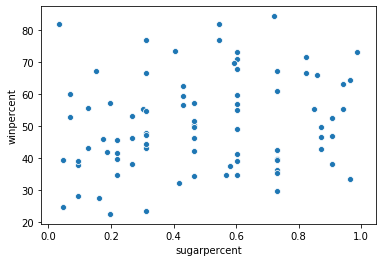

In [105]:
sns.scatterplot(x = 'sugarpercent', y = 'winpercent', data=candy)
plt.show()

#### Step2
Look at the scatter plot, are candies with more sugar relatively more or less popular with the survey respondents?

- Look at the scatter plot, it is indicated a `'positively correlation'`, meaning that both variables move in the same direction together. 

- Next, the candies with more sugar (or the `'sugarpercent'`) is less popular with the survey respondents (also `'"winpercent"'`). 

- In fact, the correllation of 2 this features is equal to 0.333861.

---> No, high sugar candies are not correlate to more popularity

### __Target 3 (Take a closer look)__
#### Step 1.
Add the _regression line_ to the scatter plot in a new window

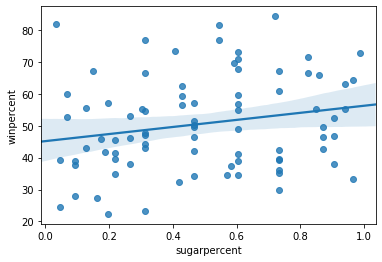

In [106]:
sns.regplot(x = 'sugarpercent', y = 'winpercent', data=candy)
plt.show()

#### Step2.
Explain the plot above; and what does this tell you about the candy that people tend to prefer?
Then, find the `'R2'` and `'R2adjusted'` values of this model

### __Target 4. Investigate each features__:  ___Chocolate___ 

#### Step 1

Create the same scatter plot you created above, but now with two regression lines, corresponding to (1) chocolate candies and (2) candies without chocolate.

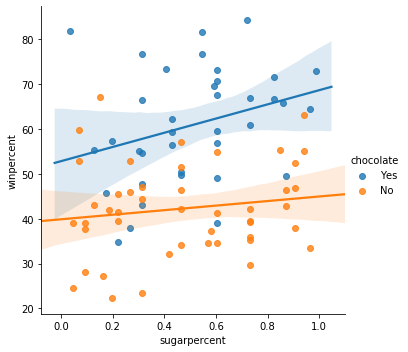

In [110]:
sns.lmplot(x = 'sugarpercent', y = 'winpercent', hue='chocolate', data=candy)
plt.show()

##### Step 2. Using the regression lines, what conclusions can you draw about the effects of chocolate and price on candy popularity?

-> Chocolate candies wiith high sugar are more popular

### __Target 5.__ _Everybody loves chocolate.?_

#### Step 1.
Using swarmplot(); create a categorical scatter plot to highlight the relationship between `'chocolate'` and `'winpercent'`.  Put `'chocolate'` on the (horizontal) x-axis, and `'winpercent'` on the (vertical) y-axis.

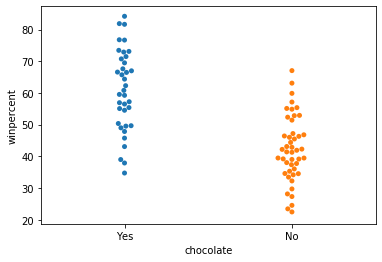

In [112]:
sns.swarmplot(x = 'chocolate', y = 'winpercent', data = candy)

plt.show()

#### Step 2.

You decide to dedicate a section of your report to the fact that chocolate candies tend to be more popular than candies without chocolate.  Which plot is more appropriate to tell this story?

-> Swarmplot

_=====================================================================================================================_